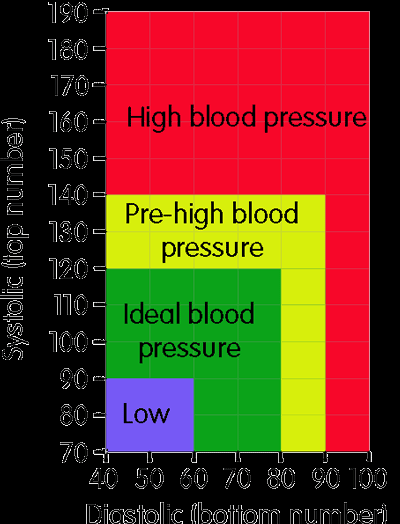
![BP-chart-2D-600-width.png](attachment:BP-chart-2D-600-width.png)

In [4]:
import numpy

In [11]:
def infer_pressure_crisp(systolic, diastolic): 
    #Define a crisp classifier of blood pressure, based on the graphic above 
    if systolic <= 90 or diastolic <= 60: 
        return 'Hypotension'
    elif systolic <= 120 and diastolic <= 80: 
        return 'Normal'
    elif systolic <= 140 or diastolic <= 90: 
        return 'High Normal'
    if systolic > 140 and  diastolic > 90: 
        return 'Hypertension'
    else: 
        return None


In [6]:
#Defining linguistics variables "systolic pressure", "diastollic pressure" and "blood "pressure" 

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Generate universe variables
#   * systolicic and diastolic on ranges [70, 240] and [40, 140]
#   * blood has a range of [0, 100] in units of percentage points
x_systolic = np.arange(70, 240, 1)
x_diastolic = np.arange(40, 140, 1)
x_blood = np.arange(0, 100, 1)

# Generate fuzzy membership functions

#Systolic pressure 
systolic_low = fuzz.trapmf(x_systolic, [70, 70, 90, 100])
systolic_medium = fuzz.trapmf(x_systolic, [90, 100, 120, 130])
systolic_high = fuzz.trapmf(x_systolic, [120, 130, 140, 150])
systolic_very_high = fuzz.trapmf(x_systolic, [140, 150, 240, 240])

#Systolic pressure 
diastolic_low = fuzz.trapmf(x_diastolic, [40, 40, 55, 65])
diastolic_medium = fuzz.trapmf(x_diastolic, [55, 65, 75, 85])
diastolic_high = fuzz.trapmf(x_diastolic, [75, 85, 100, 110])
diastolic_very_high = fuzz.trapmf(x_diastolic, [100, 110, 140, 140])

#Blood pressure 
blood_low = fuzz.trimf(x_blood, [0, 0, 33])
blood_medium = fuzz.trimf(x_blood, [0, 33, 66])
blood_high = fuzz.trimf(x_blood, [33, 66, 100])
blood_very_high = fuzz.trimf(x_blood, [66, 100, 100])


# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_systolic, systolic_low, 'b', linewidth=1.5, label='Low')
ax0.plot(x_systolic, systolic_medium, 'g', linewidth=1.5, label='Normal')
ax0.plot(x_systolic, systolic_high, 'r', linewidth=1.5, label='High')
ax0.plot(x_systolic, systolic_very_high, 'orange', linewidth=1.5, label='Very high')
ax0.set_title('Systolic pressure(x)')
ax0.legend()

ax1.plot(x_diastolic, diastolic_low, 'b', linewidth=1.5, label='Low')
ax1.plot(x_diastolic, diastolic_medium, 'g', linewidth=1.5, label='Normal')
ax1.plot(x_diastolic, diastolic_high, 'r', linewidth=1.5, label='High')
ax1.plot(x_diastolic, diastolic_very_high, 'orange', linewidth=1.5, label='Very high')

ax1.set_title('Diastolic pressure(x)')
ax1.legend()

ax2.plot(x_blood, blood_low, 'b', linewidth=1.5, label='Hypotension')
ax2.plot(x_blood, blood_medium, 'g', linewidth=1.5, label='Normal')
ax2.plot(x_blood, blood_high, 'r', linewidth=1.5, label='High normal')
ax2.plot(x_blood, blood_very_high, 'orange', linewidth=1.5, label='Hypertension')
ax2.set_title('Blood pressure(x)')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

plt.savefig("membership_functions.png")



1. IF systolicPressure(x) IS low AND diastolicPressure(x) IS low,       
THEN bloodPressure(x) IS hypotension;
2. IF systolicPressure(x) IS normal AND diastolicPressure(x) IS normal,     
THEN bloodPressure IS normal;    
3. IF systolicPressure(x) IS high AND diastolicPressure(x) IS high,    
THEN bloodPressure(x) IS high normal;    
4. IF systolicPressure(x) IS very high AND diastolicPressure(x) IS very high,    
THEN bloodPressure(x) IS hypertension

In [7]:
def infer_pressure_fuzzy(syst_value, diast_value):
    ### Funcion that implements the fuzzy rules activationand fuzzy classification, using 
    ### min-max activation and maximum aggregation method. 
    diastolic_level_low = fuzz.interp_membership(x_diastolic, diastolic_low, diast_value)
    diastolic_level_medium = fuzz.interp_membership(x_diastolic, diastolic_medium, diast_value)
    diastolic_level_high = fuzz.interp_membership(x_diastolic, diastolic_high, diast_value)
    diastolic_level_very_high = fuzz.interp_membership(x_diastolic, diastolic_very_high, diast_value)

    systolic_level_low = fuzz.interp_membership(x_systolic, systolic_low, syst_value)
    systolic_level_medium = fuzz.interp_membership(x_systolic, systolic_medium, syst_value)
    systolic_level_high = fuzz.interp_membership(x_systolic, systolic_high, syst_value)
    systolic_level_very_high = fuzz.interp_membership(x_systolic, systolic_high, syst_value)

    # Rule definition 

    active_rule1 = np.fmin(diastolic_level_low, systolic_level_low)
    blood_activation_hypotension = np.fmin(active_rule1, blood_low)  
    x_hypotension = np.max(blood_activation_hypotension)

    active_rule_2 = np.fmin(diastolic_level_medium, systolic_level_medium)
    blood_activation_normal = np.fmin(active_rule_2, blood_medium)
    x_normal = np.max(blood_activation_normal)

    active_rule3 = np.fmin(diastolic_level_high, systolic_level_high)
    blood_activation_high = np.fmin(active_rule3, blood_high)
    x_high = np.max(blood_activation_high)

    active_rule4 = np.fmin(diastolic_level_very_high, systolic_level_very_high)
    blood_activation_hypertension = np.fmin(active_rule4, blood_very_high)
    x_hypertension = np.max(blood_activation_hypertension)

    vote_weigths = [x_hypotension, x_normal, x_high, x_hypertension]
    print(vote_weigths)

    winner =  np.argmax(vote_weigths)
    
    if winner == 0: 
        return 'Hypotension'
    elif winner == 1 : 
        return 'Normal'
    elif winner == 2: 
        return 'High Normal'
    if winner == 3: 
        return 'Hypertension'
    else: 
        return None
    
infer_pressure_fuzzy(98, 65)


[0.0, 0.8, 0.0, 0.0]


'Normal'

In [8]:
import pandas as pd 

In [9]:
df = pd.read_csv("data_blood_pressure.csv")
df.head()

,SYS,DIAS,BLOOD,BLOOD_CRISP,BLOOD_FUZZY
0,125,78,Normal,NaN,NaN
1,107,54,Hypotension,NaN,NaN
2,126,81,Normal,NaN,NaN
3,110,68,Normal,NaN,NaN
4,147,97,Hypertension,NaN,NaN


In [12]:
#df["BLOOD_CRISP"] = df.apply(lambda row: infer_pressure_crisp(int(row["SYS"]), int(row["DIAS"])))
df["BLOOD_CRISP"] = df[['SYS','DIAS']].apply(lambda x: infer_pressure_crisp(*x), axis=1)
df["BLOOD_FUZZY"] = df[['SYS','DIAS']].apply(lambda x: infer_pressure_fuzzy(*x), axis=1)

[0.0, 0.5, 0.3, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.4, 0.6, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.3, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 0.2, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 0.4, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.8, 0.0, 0.0]
[0.0, 0.4, 0.0, 0.0]
[0.0, 0.3, 0.0, 0.0]
[0.0, 0.5, 0.1, 0.0]
[0.0, 0.0, 0.5, 0.0]
[0.0, 0.9, 0.0, 0.0]
[0.0, 0.0, 0.6, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.9, 0.0, 0.0]
[0.0, 0.9, 0.0, 0.0]
[0.0, 0.1, 0.5, 0.0]
[0.0, 0.8, 0.0, 0.0]
[0.0, 0.5, 0.2, 0.0]
[0.0, 0.2, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 0.6, 0.0, 0.0]
[0.1, 0.9, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 0.9, 0.0, 0.0]
[0.6, 0.3, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 0.6, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.7, 0.0, 0.0]
[0.4, 0.3, 0.0, 0.0]
[0.9, 0.0, 0.0, 0.0]
[0.0, 0.7, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.3, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.1, 0.7, 0.

In [13]:
accur_crisp = len(df[df["BLOOD"] == df["BLOOD_CRISP"]]) / len(df)
accur_crisp

0.6981132075471698

In [14]:
accur_fuzzy = len(df[df["BLOOD"] == df["BLOOD_FUZZY"]]) / len(df)
accur_fuzzy

0.8301886792452831

In [21]:
df.head()

,SYS,DIAS,BLOOD,BLOOD_CRISP,BLOOD_FUZZY
0,125,78,Normal,High Normal,Normal
1,107,54,Hypotension,Hypotension,Hypotension
2,126,81,Normal,High Normal,High Normal
3,110,68,Normal,Normal,Normal
4,147,97,Hypertension,Hypertension,High Normal


In [30]:
def class_to_number(class_name): 
    if class_name == "Hypotension":
        return 0 
    elif class_name == "Normal":
        return 1 
    elif class_name == "High Normal":
        return 2
    elif class_name == "Hypertension":
        return 3
    else: 
        return None 
df_new = df 
df_new["BLOOD"].apply(class_to_number)

0     1
1     0
2     1
3     1
4     3
5     1
6     1
7     1
8     1
9     2
10    1
11    1
12    3
13    2
14    1
15    1
16    1
17    1
18    0
19    1
20    2
21    0
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    0
36    1
37    1
38    0
39    1
40    0
41    0
42    1
43    0
44    1
45    1
46    1
47    1
48    2
49    0
50    1
51    1
52    3
Name: BLOOD, dtype: int64

## Classification with Fuzzy KNN 

source sode from: https://github.com/sahilsehwag/FuzzyKNN

In [38]:
import pprint
import operator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, ClassifierMixin

X = df[["SYS", "DIAS"]]
X = np.array(X)
y = df["BLOOD"]
y = np.array(y)

xTrain, xTest, yTrain, yTest = train_test_split(X,y)

In [39]:
X = np.array(X)


In [40]:
class FuzzyKNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k=3, plot=False):
        self.k = k
        self.plot = plot
        
        
    def fit(self, X, y=None):
        self._check_params(X,y)
        self.X = X
        self.y = y
        
        self.xdim = len(self.X[0])
        self.n = len(y)
        
        classes = list(set(y))
        classes.sort()
        self.classes = classes
        
        self.df = pd.DataFrame(self.X)
        self.df['y'] = self.y
        
        self.memberships = self._compute_memberships()
        
        self.df['membership'] = self.memberships
        
        self.fitted_ = True
        return self
    
    
    def predict(self, X):
        if self.fitted_ == None:
            raise Exception('predict() called before fit()')
        else:
            m = 2
            y_pred = []
            
            for x in X:
                neighbors = self._find_k_nearest_neighbors(pd.DataFrame.copy(self.df), x)
                
                votes = {}
                for c in self.classes:
                    den = 0
                    for n in range(self.k):
                        dist = np.linalg.norm(x - neighbors.iloc[n,0:self.xdim])
                        den += 1 / (dist ** (2 / (m-1)))
                    
                    neighbors_votes = []
                    for n in range(self.k):
                        dist = np.linalg.norm(x - neighbors.iloc[n,0:self.xdim])
                        num = (neighbors.iloc[n].membership[c]) / (dist ** (2 / (m-1)))
                        
                        vote = num/den
                        neighbors_votes.append(vote)
                    votes[c] = np.sum(neighbors_votes)
                    
                pred = max(votes.items(), key=operator.itemgetter(1))[0]
                y_pred.append((pred, votes))
                
            return y_pred
        
        
    def score(self, X, y):
        if self.fitted_ == None:
            raise Exception('score() called before fit()')
        else:
            predictions = self.predict(X)
            y_pred = [t[0] for t in predictions]
            confidences = [t[1] for t in predictions]
            
            return accuracy_score(y_pred=y_pred, y_true=y)
    
        
    def _find_k_nearest_neighbors(self, df, x):
        X = df.iloc[:,0:self.xdim].values
        
        df['distances'] = [np.linalg.norm(X[i] - x) for i in range(self.n)]
        
        df.sort_values(by='distances', ascending=True, inplace=True)
        neighbors = df.iloc[0:self.k]
        
        return neighbors

                
    def _get_counts(self, neighbors):
        groups = neighbors.groupby('y')
        counts = {group[1]['y'].iloc[0]:group[1].count()[0] for group in groups}
        
        return counts
        
        
    def _compute_memberships(self):
        memberships = []
        for i in range(self.n):
            x = self.X[i]
            y = self.y[i]
            
            neighbors = self._find_k_nearest_neighbors(pd.DataFrame.copy(self.df), x)
            counts = self._get_counts(neighbors)
        
            membership = dict()
            for c in self.classes:
                try:
                    uci = 0.49 * (counts[c] / self.k)
                    if c == y:
                        uci += 0.51
                    membership[c] = uci
                except:
                    membership[c] = 0
                    
            memberships.append(membership)
        return memberships
        
        
    def _check_params(self, X, y):
        if type(self.k) != int:
            raise Exception('"k" should have type int')
        elif self.k >= len(y):
            raise Exception('"k" should be less than no of feature sets')
        elif self.k % 2 == 0:
            raise Exception('"k" should be odd')
            
        if type(self.plot) != bool:
            raise Exception('"plot" should have type bool')

In [41]:
skModel = KNeighborsClassifier()
custModel = FuzzyKNN()

skModel.fit(xTrain, yTrain)
custModel.fit(xTrain, yTrain)

print(cross_val_score(cv=5, estimator=skModel, X=xTest, y=yTest))
print(cross_val_score(cv=5, estimator=custModel, X=xTest, y=yTest))

C:\Users\melania\Anaconda3\envs\resbot\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\melania\Anaconda3\envs\resbot\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[0.5        0.5        0.66666667 1.         1.        ]
[0.75 0.5  1.   1.   1.  ]


In [44]:
print("accuracy of fuzzy KNN: ", (0.5 + 0.67 + 0.5 + 1 + 1)/5)


accuracy of fuzzy KNN:  0.734


In [43]:
print("accuracy of fuzzy KNN: ", (0.75 + 0.5 + 1 + 1 + 1)/5)

accuracy of fuzzy KNN:  0.85
